![](figures/pandasanatomy.png)

In [2]:
import pandas as pd
import numpy as np

## Missing Data

In [2]:
value = np.array([1,None,3,4])

In [ ]:
# value.sum() : 널데이터는 연산 불가능 

In [4]:
# np.nan 은 연산은 안되나 예외처리 이벤트 발생 안됨
np.array([1,np.nan,3,4]).sum()

nan

In [5]:
data = pd.Series([1,np.nan,'hello',None])

In [6]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [7]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [8]:
data[-data.isnull()]

0        1
2    hello
dtype: object

In [10]:
data_notnull = data.dropna()

In [11]:
data_notnull

0        1
2    hello
dtype: object

In [13]:
df = pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [17]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [18]:
df.dropna(axis = 1)

,2
0,2
1,5
2,6


In [19]:
data = pd.Series([1,np.nan,2,None,3], index = list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [20]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [21]:
# 앞 데이터 복사 -> 순서데이터에서 유용 
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [22]:
# 뒤 데이터 복사
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [37]:
df[3]=np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [38]:
df.fillna(method='ffill', axis=1).fillna(method='ffill')

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,2.0,4.0,6.0,6.0


In [40]:
mean =  np.mean(df.dropna(axis=1).to_numpy())

In [41]:
df.fillna(mean)

,0,1,2,3
0,1.000000,4.333333,2,4.333333
1,2.000000,3.000000,5,4.333333
2,4.333333,4.000000,6,4.333333


In [26]:
ebola = pd.read_csv('data/country_timeseries.csv')

In [28]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [29]:
ebola.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ebola.fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,66.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0
118,3/26/2014,4,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,3/25/2014,3,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,3/24/2014,2,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
ebola.fillna(method='bfill').iloc[:10,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [34]:
ebola.sum()

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                       84729
Cases_Liberia                                                     193833
Cases_SierraLeone                                                 211181
Cases_Nigeria                                                        636
Cases_Senegal                                                         27
Cases_UnitedStates                                                    59
Cases_Spain                                                           16
Cases_Mali                                                            42
Deaths_Guinea                                                      51818
Deaths_Liberia                                                     89198
Deaths_SierraLeone                                                 60352
Deaths_Nigeria                                     

In [35]:
ebola.sum(skipna=False)

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                         NaN
Cases_Liberia                                                        NaN
Cases_SierraLeone                                                    NaN
Cases_Nigeria                                                        NaN
Cases_Senegal                                                        NaN
Cases_UnitedStates                                                   NaN
Cases_Spain                                                          NaN
Cases_Mali                                                           NaN
Deaths_Guinea                                                        NaN
Deaths_Liberia                                                       NaN
Deaths_SierraLeone                                                   NaN
Deaths_Nigeria                                     

In [42]:
billboard = pd.read_csv('data/billboard.csv')

In [47]:
# 중복데이터 확인
billboard.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [48]:
billboard.tail()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,matchbox twenty,Bent,4:12,2000-04-29,60,37.0,29.0,24.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Broadcast

In [50]:
scientists = pd.read_csv('data/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [51]:
scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [53]:
scientists.Born[0:2]

0    1920-07-25
1    1876-06-13
Name: Born, dtype: object

In [57]:
born_datetime = pd.to_datetime(scientists.Born, format='%Y-%m-%d')
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [59]:
died_datetime = pd.to_datetime(scientists.Died, format='%Y-%m-%d')
died_datetime

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]

In [81]:
died_datetime - born_datetime

0   13779 days
1   22404 days
2   32964 days
3   24345 days
4   20777 days
5   16529 days
6   15324 days
7   28422 days
dtype: timedelta64[ns]

In [75]:
scientists['born_dt'], scientists['died_dt'] = born_datetime, died_datetime

In [76]:
scientists.tail()

,Name,Born,Died,Age,Occupation,born_dt,died_dt
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23


In [82]:
scientists['age_days_dt'] = (scientists.died_dt - scientists.born_dt)

In [83]:
scientists.tail()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [92]:
scientists['dif_days_dt'] = scientists.born_dt - scientists.born_dt
scientists.tail()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt,dif_days_dt
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,0 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,0 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,0 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,0 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,0 days


In [93]:
scientists.drop(['dif_days_dt'],axis = 1, inplace = True)
scientists.tail()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [97]:
(scientists.age_days_dt.dt.days/365).astype(int)

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: age_days_dt, dtype: int32

## Boolean Indexing

In [101]:
movie = pd.read_csv('data/movie.csv')
movie.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
4915,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [103]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [105]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [106]:
movie.director_name[:5]

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object

In [107]:
movie.director_name.iloc[:10:2]

0    James Cameron
2       Sam Mendes
4      Doug Walker
6        Sam Raimi
8      Joss Whedon
Name: director_name, dtype: object

In [109]:
movie = pd.read_csv('data/movie.csv', index_col = 'movie_title')
movie.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Signed Sealed Delivered,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
The Following,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
Shanghai Calling,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
My Date with Drew,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [110]:
movie.loc['Avatar':'The Dark Knight Rises']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


In [111]:
movie.color.head(2)

movie_title
Avatar                                      Color
Pirates of the Caribbean: At World's End    Color
Name: color, dtype: object

In [112]:
set(movie.color)
# movie.color.unique()

{'Black and White', 'Color', nan}

In [116]:
movie.imdb_score.dropna().mean()

6.4374288039056085

In [117]:
print(list(set(movie.content_rating)))

[nan, 'TV-MA', 'Not Rated', 'GP', 'TV-14', 'G', 'X', 'Approved', 'M', 'NC-17', 'Passed', 'PG', 'TV-PG', 'R', 'PG-13', 'Unrated', 'TV-Y7', 'TV-G', 'TV-Y']


In [119]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [137]:
movie.loc[(movie.imdb_score > 8) & (movie.content_rating == 'PG-13') & (movie.title_year > 2010),
          ['imdb_score','content_rating','title_year']].head(2)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0


In [138]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = movie.title_year > 2010
criteria = criteria1 & criteria2 & criteria3

In [139]:
movie.loc[criteria,['imdb_score','content_rating','title_year']]

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
The Martian,8.1,PG-13,2015.0
The Help,8.1,PG-13,2011.0
Warrior,8.2,PG-13,2011.0
The Imitation Game,8.1,PG-13,2014.0


In [140]:
slb = pd.read_csv('data/slb_stock.csv')
slb.tail()

,Date,Open,High,Low,Close,Volume
1890,2017-07-10,64.82,65.68,64.78,65.35,5873639
1891,2017-07-11,65.35,66.24,65.07,65.79,5534042
1892,2017-07-12,66.52,66.60,65.34,65.58,6497554
1893,2017-07-13,65.47,66.54,65.44,66.49,6252255
1894,2017-07-14,66.50,67.09,66.37,66.85,5340611


In [142]:
slb = slb.set_index('Date')
slb.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-10,64.82,65.68,64.78,65.35,5873639
2017-07-11,65.35,66.24,65.07,65.79,5534042
2017-07-12,66.52,66.60,65.34,65.58,6497554
2017-07-13,65.47,66.54,65.44,66.49,6252255
2017-07-14,66.50,67.09,66.37,66.85,5340611


In [143]:
slb = slb.reset_index()
slb.tail()

,Date,Open,High,Low,Close,Volume
1890,2017-07-10,64.82,65.68,64.78,65.35,5873639
1891,2017-07-11,65.35,66.24,65.07,65.79,5534042
1892,2017-07-12,66.52,66.60,65.34,65.58,6497554
1893,2017-07-13,65.47,66.54,65.44,66.49,6252255
1894,2017-07-14,66.50,67.09,66.37,66.85,5340611


In [144]:
slb_close = slb.Close

In [151]:
slb_summary = slb_close.describe(percentiles=[.1,.9])

In [152]:
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [154]:
lower_10, upper_10 = slb_summary['10%'], slb_summary['90%']

In [155]:
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

In [156]:
import matplotlib.pyplot as plt

In [159]:
slb_date = slb.set_index('Date')
slb_close = slb_date.Close

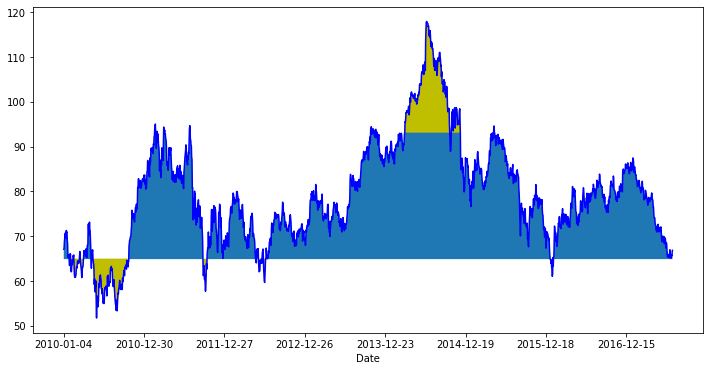

In [168]:
slb_close.plot(color='b', figsize=(12,6))
plt.fill_between(criteria.index, lower_10, slb_close.values)
plt.fill_between(criteria.index, lower_10, slb_close.values, where = slb_close < lower_10, color = 'y')
plt.fill_between(criteria.index, upper_10, slb_close.values, where = slb_close > upper_10, color = 'y')

## Merge

In [170]:
df1 = pd.read_csv('data/concat_1.csv')
df2 = pd.read_csv('data/concat_2.csv')
df3 = pd.read_csv('data/concat_3.csv')

In [174]:
df1.head(1)

,A,B,C,D
0,a0,b0,c0,d0


In [175]:
df2.head(1)

,A,B,C,D
0,a4,b4,c4,d4


In [176]:
df3.head(1)

,A,B,C,D
0,a8,b8,c8,d8


In [182]:
pd.concat([df1,df2,df3], ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [183]:
pd.concat([df1,df2,df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


## Apply

In [3]:
df = pd.DataFrame({'a':[10,20,30], 'b':[20,30 ,40]})

In [4]:
def my_sqrt(x):
    return x**2

In [5]:
def my_exp(x, n):
    return x**n

In [6]:
df.a.apply(my_sqrt)

0    100
1    400
2    900
Name: a, dtype: int64

In [7]:
df['c'] = df.a.apply(my_exp, n=4)
df

,a,b,c
0,10,20,10000
1,20,30,160000
2,30,40,810000


In [8]:
def avg_df(x):
    return (x[0]+x[1]+x[2])/3

In [9]:
df.apply(avg_df)

a        20.000000
b        30.000000
c    326666.666667
dtype: float64

In [186]:
import seaborn as sns

In [187]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [188]:
def count_missing(vec):
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

In [191]:
titanic.apply(count_missing)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [192]:
titanic['num_missing'] = titanic.apply(count_missing, axis=1)

In [194]:
titanic.iloc[0:4,-1:-4:-1]

,num_missing,alone,alive
0,1,False,no
1,0,False,yes
2,1,True,yes
3,0,False,yes


In [11]:
inflation = pd.Series((2.2, 3.4, 2.8, 1.6, 2.3, 2.7, 3.4, 3.2, 2.8, 3.8, -0.4, 1.6, 3.2, 2.1, 1.6, 1.5))
inflation.head()

0    2.2
1    3.4
2    2.8
3    1.6
4    2.3
dtype: float64

In [12]:
inflation.index = pd.Index(range(1999,2015))
inflation.head()

1999    2.2
2000    3.4
2001    2.8
2002    1.6
2003    2.3
dtype: float64

In [13]:
inflation.index.name = 'Year'
inflation.name = "%"
inflation.head(2)

Year
1999    2.2
2000    3.4
Name: %, dtype: float64

In [14]:
inflation.reset_index()

,Year,%
0,1999,2.2
1,2000,3.4
2,2001,2.8
3,2002,1.6
4,2003,2.3
5,2004,2.7
6,2005,3.4
7,2006,3.2
8,2007,2.8
9,2008,3.8


In [16]:
alco2009 = pd.read_csv('book/niaaa-report2009.csv', index_col='State')
alco2009.head()

,Beer,Wine,Spirits
State,,,
Alabama,1.20,0.22,0.58
Alaska,1.31,0.54,1.16
Arizona,1.19,0.38,0.74
Arkansas,1.07,0.17,0.60
California,1.05,0.55,0.73


In [17]:
alco2009.columns

Index(['Beer', 'Wine', 'Spirits'], dtype='object')

In [18]:
"Samoa" in alco2009.index

False

In [19]:
s_states =[ state for state in alco2009.index if state[0] =='S']+['Samoa']
drinks =list(alco2009.columns)+['Water']

In [21]:
nan_alco = alco2009.reindex(s_states, columns=drinks)
nan_alco

,Beer,Wine,Spirits,Water
State,,,,
South Carolina,1.36,0.24,0.77,NaN
South Dakota,1.53,0.22,0.88,NaN
Samoa,NaN,NaN,NaN,NaN


In [22]:
alco = pd.read_csv("book/niaaa-report.csv", index_col=["State"])
alco.head()

,Year,Beer,Wine,Spirits
State,,,,
Alabama,1977,0.99,0.13,0.84
Alabama,1978,0.98,0.12,0.88
Alabama,1979,0.98,0.12,0.84
Alabama,1980,0.96,0.16,0.74
Alabama,1981,1.00,0.19,0.73


In [24]:
alco = alco.reset_index().set_index(["State","Year"])
alco.head()

Beer  Wine  Spirits
State   Year                     
Alabama 1977  0.99  0.13     0.84
        1978  0.98  0.12     0.88
        1979  0.98  0.12     0.84
        1980  0.96  0.16     0.74
        1981  1.00  0.19     0.73

In [25]:
tall_alco = alco.stack()
tall_alco

State    Year         
Alabama  1977  Beer       0.99
               Wine       0.13
               Spirits    0.84
         1978  Beer       0.98
               Wine       0.12
                          ... 
Wyoming  2008  Wine       0.23
               Spirits    1.12
         2009  Beer       1.45
               Wine       0.22
               Spirits    1.10
Length: 5049, dtype: float64

In [26]:
tall_alco.index.names=['State', 'Year','Drink']
tall_alco.head()

State    Year  Drink  
Alabama  1977  Beer       0.99
               Wine       0.13
               Spirits    0.84
         1978  Beer       0.98
               Wine       0.12
dtype: float64

In [27]:
wide_alco = alco.unstack()
wide_alco.head()

Beer                                                        ...  \
Year        1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  ...   
State                                                                   ...   
Alabama     0.99  0.98  0.98  0.96  1.00  1.00  1.01  1.02  1.06  1.09  ...   
Alaska      1.19  1.39  1.50  1.55  1.71  1.75  1.76  1.73  1.68  1.68  ...   
Arizona     1.70  1.77  1.86  1.69  1.78  1.74  1.62  1.57  1.67  1.77  ...   
Arkansas    0.92  0.97  0.93  1.00  1.06  1.03  1.03  1.02  1.03  1.06  ...   
California  1.31  1.36  1.42  1.42  1.43  1.37  1.37  1.38  1.32  1.36  ...   

           Spirits                                                        
Year          2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  
State                                                                     
Alabama       0.51  0.53  0.53  0.52  0.52  0.53  0.55  0.56  0.58  0.58  
Alaska        0.92  0.97  1.08  0.79  0.96  0.99  1.02  1.07  1.09  1.16  
Arizona       0.71  0.70  0.69  0.71  0.70  0.74  0.78  0.76  0.75  0.74  
Arkansas      0.53  0.53  0.53  0.56  0.58  0.58  0.59  0.60  0.60  0.60  
California    0.64  0.64  0.63  0.65  0.67  0.68  0.70  0.72  0.72  0.73  

[5 rows x 99 columns]

In [28]:
nan_alco

,Beer,Wine,Spirits,Water
State,,,,
South Carolina,1.36,0.24,0.77,NaN
South Dakota,1.53,0.22,0.88,NaN
Samoa,NaN,NaN,NaN,NaN


In [29]:
nan_alco.isnull()

,Beer,Wine,Spirits,Water
State,,,,
South Carolina,False,False,False,True
South Dakota,False,False,False,True
Samoa,True,True,True,True


In [30]:
nan_alco.Spirits.mean()

0.825

In [31]:
clean = nan_alco.Spirits.notnull()
clean

State
South Carolina     True
South Dakota       True
Samoa             False
Name: Spirits, dtype: bool

In [33]:
sp = nan_alco.Spirits
sp[-clean] = sp[clean].mean()
sp

State
South Carolina    0.770
South Dakota      0.880
Samoa             0.825
Name: Spirits, dtype: float64

In [34]:
nan_alco

,Beer,Wine,Spirits,Water
State,,,,
South Carolina,1.36,0.24,0.770,NaN
South Dakota,1.53,0.22,0.880,NaN
Samoa,NaN,NaN,0.825,NaN
